# MNIST

El conjunto de datos **MNIST** contiene 70,000 imágenes pequeñas de dígitos escritos a mano. El conjunto consiste en imágenes en escala de grises de dígitos escritos a mano (números del 0 al 9). Cada imagen tiene una resolución de 28 * 28 píxeles.

## Clasificador Binario

In [ ]:
import numpy as np

In [ ]:
# Carga del conjunto de datos MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# Extraer la información para las variables independiente y dependiente
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

Cada imagen tiene 784 características. Cada imagen tiene las dimensiones de `28 * 28` pixéles, cada características representa un pixel, desde 0 (blanco) a 255 (negro).

En Scikit-learn, el conjunto de datos MNIST es cargado como un objeto de tipo `Bunch`, que es un contenedor similar a un diccionario que contiene varios elementos, incluyendo los datos y las etiquetas.

`X.to_numpy()` convierte el objeto `X` a un arreglo NumPy.

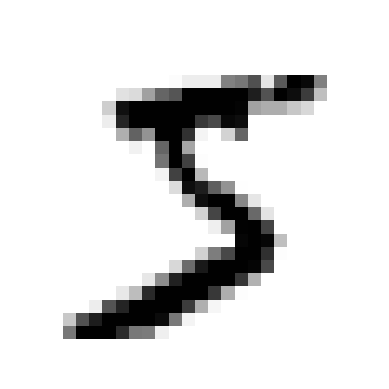

In [ ]:
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
y = y.astype(np.uint8)
y[0]

5

Debemos de crear el conjunto de entrenamiento y testing. El conjunto MNIST ya esta barajeado, siendo las primeras 60,000 imágenes para el conjunto de entrenamiento y las restantes 10,000 para el conjunto de testing. Gracias a que el conjunto ya se encuentra listo para ser utilizado podemos estar seguros de que la validación `cross-validation` serán similares, por lo que tendremos un resultado que nos garantice un correcto resultado.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Entrenamiento del Clasificador Binario

Este problema se encargará sólamente de detectar el número 5, por lo que filtraremos el conjunto para obtener solamente las imágenes que dibujan el número 5.

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## SGDClassifier

Para comenzar utilizaremos el clasificador SGDClassifier (*Stochastic Gradient Descent*). Este clasificador funciona muy bien con largos conjuntos de datos, esto se debe a que toma cada instancia de entrenamiento de forma independiente, uno a la vez.

Este clasificador pertenecer a la familia de clasificadores lineales.

Algunas situaciones comunes para su implementación son:

- **Grandes conjuntos de datos**: Debido a su capacidad para trabajar con lotes pequeños de datos a la vez, este clasificador es eficiente para conjuntos de datos grandes que no caben en la memoria.
- **Problemas de clasificación binaria o multiclase**.

El SGDClassifier utiliza el método de Descenso de Gradiente Estocástico para optimizar una función de pérdida en lugar de utilizar el conjunto completo de datos en cada iteración. El descenso de gradiente estocástico es una técnica que actualiza los parámetros del modelo de forma iterativa, utilizando solo un pequeño lote de datos (minilote) en cada paso.

#### Ventajas y desventajas

**Ventajas**

1. **Eficiencia en grandes conjuntos de datos**
2. **Adaptabilidad**: Es adaptable y puede ser utilizado para problemas de clasificación lineal variados.

**Desventajas**

1. **Sensibilidad a la escala**: Puede ser sensible a la escala de las características, por lo que la normalización de las características puede ser necesaria.
2. **Necesidad de ajuste de hiperparámetros**: Requiere ajuste de hiperparámetros, para obtener un rendimiento óptimo.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_classifier.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### Medir el rendimiento

Evaluar clasificadores es más complicado que los algoritmos de regresión.

##### Cross-Validation

Utilizaremos `cross_val_score()` para evaluar `SGDClassifier` utilizando validación cruzada de K-fold con tres pliegues. `K-fold cross-validation` significa dividir el conjunto de entrenamiento en `K` pliegues (en este caso 3).

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### Matriz de Confusión

La idea general de la matriz de confusión es contar el número de veces que la instancia de clase A son clasificados como clase B. `cross_val_predict()` retorna la predicción escha en cada división hecha.

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 3)

|||
|--|--|
|TN|FP|
|FN|TP|

- *53,892* imágenes fueron correctamente clasificadas como no 5
- *687* fueron erroneamente clasificadas como 5
- *1,891* fueron erroneamente clasificadas como no 5
- *3,530* fueron correctamente clasificados como 5

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Otras métricas más concisas de los algoritmos de clasificación son la métrica de *precision* y *recall*.

$$
precision = \frac{TP}{TP + FP}
$$

*TP* es el número de verdaderos positivos, y *FP* es el número de falsos positivos.

$$
recall = \frac{TP}{TP+FN}
$$

*FN* es el número de falsos positivos.

#### *Precision* y *Recall*

El modelo cada vez que detecta un número 5 acierta un *83.71%*. Además, solo deteca un *65.12%* de los números 5.

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Existe una métrica que combina los valores de *precision* y *recall* llamada *F1 score*. La métrica *F1 score* es el promedio armonico (*harmonic mean*) de *precision* y *recall*. Mientras el promedio regular trata todos los valores de la misma manera, el promedio armónico da más peso a los valores pequeños. Como resultado, el clasificador obtiene un valor alto de *F1* si *precision* y *recall* son altos.

$$
F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846